Mean: 2.47
Std Dev: 24.40
Threshold (mean + 2*std): 51.26
95th percentile: 12.51
99th percentile: 23.96
99.5th percentile: 29.91


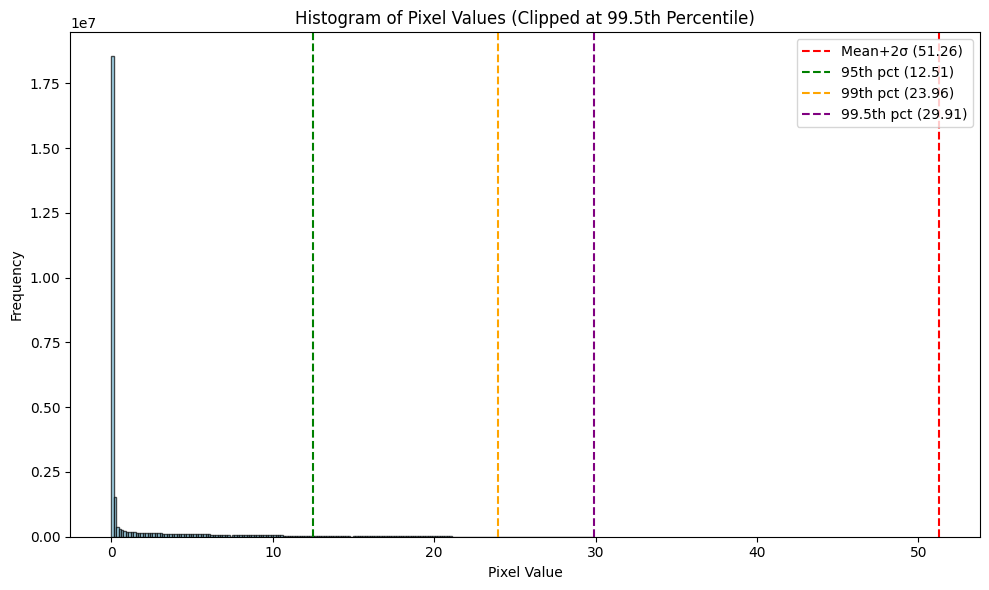

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to your GeoTIFF
geotiff_path = r"E:\GOES-R Lightning Data\EAST-RASTERS\east_max_energy_2023.tif"

# Open raster
with rasterio.open(geotiff_path) as src:
    data = src.read(1)  # first band
    nodata = src.nodata

# Mask NoData
if nodata is not None:
    data = np.where(data == nodata, np.nan, data)

vals = data.flatten()
vals = vals[~np.isnan(vals)]  # drop NaNs

# Stats
mean_val = np.mean(vals)
std_val = np.std(vals)
threshold_std = mean_val + 2 * std_val

# Percentile thresholds
p95 = np.percentile(vals, 95)
p99 = np.percentile(vals, 99)
p995 = np.percentile(vals, 99.5)

print(f"Mean: {mean_val:.2f}")
print(f"Std Dev: {std_val:.2f}")
print(f"Threshold (mean + 2*std): {threshold_std:.2f}")
print(f"95th percentile: {p95:.2f}")
print(f"99th percentile: {p99:.2f}")
print(f"99.5th percentile: {p995:.2f}")

# Plot histogram (focus on natural values)
plt.figure(figsize=(10,6))
plt.hist(vals, bins=200, range=(0, np.percentile(vals, 99.5)), 
         color="skyblue", edgecolor="k", alpha=0.7)

# Add threshold lines
plt.axvline(threshold_std, color="red", linestyle="--", label=f"Mean+2σ ({threshold_std:.2f})")
plt.axvline(p95, color="green", linestyle="--", label=f"95th pct ({p95:.2f})")
plt.axvline(p99, color="orange", linestyle="--", label=f"99th pct ({p99:.2f})")
plt.axvline(p995, color="purple", linestyle="--", label=f"99.5th pct ({p995:.2f})")

plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Values (Clipped at 99.5th Percentile)")
plt.legend()
plt.tight_layout()
plt.show()
